In [164]:
from classy import Class
import numpy as np
from matplotlib import pyplot as plt

Brane Inflation Potential and its derivatives 

In [165]:
from math import pi
csteGrav = 6.6743015e-11
M_pl = 1/np.sqrt(8*pi*csteGrav)

# M_pl = 1

def V_brane(phi,M4,mu,n):
    return(M4/(1+pow(mu/phi,n)))

def V_shift(phi,phi0,M4,mu,n):
    return(V_brane(phi0-phi,M4,mu,n))

def dV_brane(phi,M4,mu,n):
    factor = M4*n*pow(mu,n)
    denom = pow(phi,n)+pow(mu,n)
    return(factor*pow(phi,n-1)/pow(denom,2))

def ddV_brane(phi,M4,mu,n):
    factor = M4*n*pow(mu,n)
    factor2 = (n-1)*pow(mu,n)-(n+1)*pow(phi,n)
    denom = pow(mu,n)+pow(phi,n)
    return(factor*factor2/pow(denom,3))


Slow-roll parameters (analytical formulaes I computed)

In [166]:

def epsilon1(phi,M4,mu,n):
    x=phi/mu
    factor=pow(n*M_pl/mu, 2)
    return( 0.5*factor/pow(x*(pow(x,n)+1),2)  )

def epsilon2(phi,M4,mu,n):
    x=phi/mu
    factor = 2*n*pow(M_pl/mu,2)
    numerator = (n+1)*pow(x,n)+1
    denominator = x*(pow(x,n)+1)
    return( factor*numerator/pow(denominator,2) )

def epsilon3(phi,M4,mu,n):
    x=phi/mu
    factor = n*pow(M_pl/mu,2)
    numerator = 2 + (n-4)*(n+1)*pow(x,n)  + (n+1)*(n+2)*pow(x,2*n)
    denominator = pow( x*(pow(x,n)+1) , 2)
    denominator = denominator* ((n+1)*pow(x,n) + 1 )
    return( factor * numerator / denominator)

Slow-roll parameters (computed)

In [167]:
def epsilon1_true(phi,M4,mu,n):
    factor = 0.5*pow(M_pl/mu,2)
    return(factor*pow(dV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n),2)  )

def epsilon2_true(phi,M4,mu,n):
    factor1 = pow(M_pl/mu,2)
    factor2 = 0.5*pow(M_pl/mu,2)
    quotient1 = ddV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n)
    quotient2 = dV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n)
    return(factor1*factor2*(pow(quotient2,2) - quotient1))
    return(factor*factor2/pow(denom,3))

Calculate $\phi_{end}$ and $\phi_{start}$

In [168]:
#Calcule phi tel que V(phi) proche de M4 ... la précision recquise est expliquée après  (en fait elle dépend de M4 et donc de mu  (car M4/mu4 = 16/27))
def calculate_phi_start_BI(M4,mu,n,precision):
    return(mu*pow(M4/precision,1/n))

In [169]:
# from math import pi
# csteGrav = 6.6743015e-11
# M_pl = 1/np.sqrt(8*pi*csteGrav)

# def test1(precision):
#     mu = M_pl*1e-3
#     M4=4*pi*pi*pow(mu,4)*16/27
#     n=4
#     phi_start = M_pl*0.004
#     phi=M_pl*np.linspace(0,0.,10000)
    
#     V1 = V_brane(phi,M4,mu,n)
#     V2 = V_shift(phi,phi_start,M4,mu,n)

#     plt.plot(phi/M_pl,V1,"b-",label=r'$V(\phi)$')
#     plt.plot(phi/M_pl,V2,"r-",label=r'$V(\phi_0-\phi)$')

#     plt.xlabel(r'$\phi / M_{Pl}$')
#     plt.ylabel(r'$V(\phi) , V(\phi_0-\phi)$')
#     plt.legend()
#     plt.show()

# test1(1e-1)
    


In [170]:
# eta= 10e-10


# def fonction_precision(eta):
#     liste_mu = M_pl*np.logspace(-3,3,7)
#     liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    

#     n=4

#     liste_phi_start = [calculate_phi_start_BI(liste_mu[i],liste_M4[i], n ,eta)  for i in range(len(liste_mu)) ]

#     print("précision : ",eta)
#     print("")
#     print(r"$\mu$",liste_mu)
#     print(r'M^4 : ',liste_M4)
#     print(r'$\phi_{start} : ',liste_phi_start)
#     print("* - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - * - *")

# fonction_precision(1e-1)
# fonction_precision(1e-10)
# fonction_precision(1e-100)

Algorithm to find Phi_pivot at which the slow-roll parameters are evaluated

In [171]:
## précision nécessaire pour pouvoir atteindre phi tel que  V(phi) proche de M4   (on utilise cette précision dans la fonction calculate phi start)
def precision_mu(mu,N):
    return(pow(10,-(20-N*(np.log10(mu/M_pl)+3))))

Essais pour trouver fction précision

In [189]:
##essais

def essai3(N0):
    mu = pow(10,N0)*M_pl
    M4=4*pi*pi*pow(mu,4)*16/27


    eta = precision_mu(mu,4)
    print("precision",eta)

    phi_deb = calculate_phi_start_BI(M4,mu,4,eta)
    print("phi_deb/Mpl",phi_deb/M_pl)
    
    plot_BI(M4,mu,n)
    plottt(M4,mu,4,eta)

precision 1e-20
phi_deb/Mpl 3.689136033667842e-10


IndexError: GridSpec slice would result in no space allocated for subplot

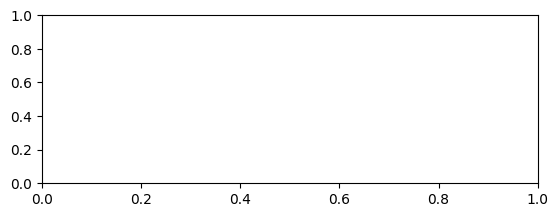

In [190]:
essai3(-3)

essais bis

In [174]:
n=2
csteGrav = 6.6743015e-11


liste_mu = M_pl*np.logspace(-3,3,7)
liste_M4=4*pi*pi*pow(liste_mu,4)*16/27


precision = precision_mu(liste_mu,4)

phi_max = calculate_phi_start_BI(liste_M4,liste_mu,n,precision)

for i in range(len(liste_mu)):
    print(r'$\mu / M_pl$',liste_mu[i]/M_pl)
    print("phi_max",phi_max[i]/M_pl)
    print("")


$\mu / M_pl$ 0.001
phi_max 28834491478.97728

$\mu / M_pl$ 0.01
phi_max 288344914789.7728

$\mu / M_pl$ 0.09999999999999999
phi_max 2883449147897.728

$\mu / M_pl$ 1.0
phi_max 28834491478977.28

$\mu / M_pl$ 10.0
phi_max 288344914789772.8

$\mu / M_pl$ 100.0
phi_max 2883449147897728.5

$\mu / M_pl$ 1000.0000000000001
phi_max 2.883449147897729e+16



In [175]:
def couleur(i,N):
    myColor = plt.get_cmap("Dark2")
    return("b")
    return(myColor((i+1)/N))

In [186]:
from matplotlib.patches import Rectangle

def plot_BI(M4,mu,n):

    fig = plt.figure()
    ax1 = plt.subplot2grid((2, 1), (0, 0))
    ax2 = plt.subplot2grid((2, 1), (0, 1))
    ax3 = plt.subplot2grid((2, 2), (1, 0))
    ax4 = plt.subplot2grid((2, 2), (1, 1))

    phi = M_pl*np.linspace(-10,10,10000)
    V = V_brane(phi,M4,mu,n)
    E1 = epsilon1(phi/M_pl,M4,mu,n)
    E2 = epsilon2(phi/M_pl,M4,mu,n)
    E3 = epsilon3(phi/M_pl,M4,mu,n)

    ax1.plot(phi/M_pl,V/M4)
    ax2.plot(phi/M_pl,E1)
    ax3.plot(phi/M_pl,E2)
    ax4.plot(phi/M_pl,E3)

    fig.suptitle(f'Brane Inflation Potential and slow-roll parameters for p = {n}') 
    ax2.set_yscale('log')
    ax3.set_yscale('log')
    ax4.set_yscale('log')


    ax3.set_xlabel(r'$\phi / \mu$')
    ax4.set_xlabel(r'$\phi / \mu$')

    ax1.set_ylabel(r'$V(\phi)$')
    ax2.set_ylabel(r"$\epsilon_1(\phi)$")
    ax3.set_ylabel(r"$\epsilon_2(\phi)$")
    ax4.set_ylabel(r"$\epsilon_3(\phi)$")


    plt.tight_layout()
    plt.show()


def plottt(M4,mu,n,eta):
    fig = plt.figure()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


    phi_deb = calculate_phi_start_BI(M4,mu,n,eta)
    print(r"$\phi_{deb}$",phi_deb)
    print(r"$\phi/M_{pl}$",phi_deb/M_pl)

    phi = M_pl*np.linspace(0,phi_deb/M_pl,10000)

    V = V_brane(phi,M4,mu,n)

    VV = V_shift(phi,phi_deb,M4,mu,n)

    ax1.plot(phi/M_pl,V/M4)
    ax2.plot(phi/M_pl,VV/M4)
 

    fig.suptitle(f'Brane Inflation Potential and slow-roll parameters for p = {n}') 
    

    ax1.set_xlabel(r'$\phi / \mu$')
    ax2.set_xlabel(r'$\phi / \mu$')

    ax1.set_ylabel(r'$V(\phi)$')
    ax2.set_ylabel(r"$V(\phi_0-\phi)$")

    plt.tight_layout()
    plt.show()

def plot_all_BI(M4,mu,n,eta,couleur):
    fig = plt.figure()
    ax1 = plt.subplot(2,3,1)
    ax2 = plt.subplot(2,3,2)
    ax3 = plt.subplot(2,3,3)
    ax4 = plt.subplot(2,3,4)
    ax5 = plt.subplot(2,3,5)

    phi_deb=calculate_phi_start_BI(M4,mu,n,eta)
    phi = M_pl*np.linspace(0,phi_deb/M_pl,10000)
    V1 = V_brane(phi,M4,mu,n)
    V2 = V_shift(phi,phi_deb,M4,mu,n)

    E1 = epsilon1(phi/M_pl,M4,mu,n)
    E2 = epsilon2(phi/M_pl,M4,mu,n)
    E3 = epsilon3(phi/M_pl,M4,mu,n)

    ax1.plot(phi/M_pl,V1/M4,color=couleur)
    ax1.set_ylabel(r'$V(\phi)$')
    
    ax2.plot(phi/M_pl,V2/M4,color=couleur)
    ax2.set_ylabel(r'$V(\phi_0-\phi)$')

    ax3.plot(phi/M_pl,E1,color=couleur)
    ax4.plot(phi/M_pl,E2,color=couleur)
    ax5.plot(phi/M_pl,E3,color=couleur)
    ax3.set_ylabel(r"$\epsilon_1(\phi)$")
    ax4.set_ylabel(r"$\epsilon_2(\phi)$")
    ax5.set_ylabel(r"$\epsilon_3(\phi)$")

    ax3.set_xlabel(r'$\phi / \mu$')
    ax4.set_xlabel(r'$\phi / \mu$')
    ax5.set_xlabel(r'$\phi / \mu$')

    fig.suptitle(r'Brane Inflation Potential and slow-roll parameters for p ='+str(n)+r'when $\mu/M_{Pl} = $'+str(mu/M_pl)) 
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')

    plt.tight_layout()
    plt.show()

def plot_all_BI_wrt_mu(M4,mu,n,eta,couleur):
    fig = plt.figure(figsize=(10,7))
    ax1 = plt.subplot(2,3,1)
    ax2 = plt.subplot(2,3,2)
    ax3 = plt.subplot(2,3,3)
    ax4 = plt.subplot(2,3,4)
    ax5 = plt.subplot(2,3,5)
    ax6 = plt.subplot(2,3,6)

    phi_deb=calculate_phi_start_BI(M4,mu,n,eta)  #2 arbitraire, pcq c mieux
    
    print(" * - *  VERIF * - * ")
    print(r"$\phi_{deb}",phi_deb/M_pl)

    list_phi = np.linspace(0,phi_deb,10000)
    V1 = V_brane(list_phi,M4,mu,n)
    V2 = V_shift(list_phi,phi_deb,M4,mu,n)

    E1 = epsilon1(list_phi,M4,mu,n)
    E2 = epsilon2(list_phi,M4,mu,n)
    E3 = epsilon3(list_phi,M4,mu,n)
    E1bis = epsilon1_bis(list_phi,M4,mu,n)

    ax1.plot(list_phi/M_pl,V1/M4,color=couleur)
    ax1.set_ylabel(r'$V(\phi)$')
    ax1.set_xlabel(r'$\phi/M_{Pl}$')
    
    ax2.plot(list_phi/mu,V2/M4,color=couleur)
    ax2.set_ylabel(r'$V(\phi_0-\phi)$')
    ax2.set_xlabel(r'$\phi/\mu$')

    print("Verifications !!")
    print("les phi/mu")
    print(list_phi/mu)
    print("les phi/Mpl")
    print(list_phi/M_pl)
    print("les epsilon 1")
    print(pow(mu/M_pl,2)*E1)

    ax3.plot(list_phi/mu,pow(mu/M_pl,2)*E1,color=couleur)
    ax4.plot(list_phi/mu,pow(mu/M_pl,2)*E2,color=couleur)
    ax5.plot(list_phi/mu,pow(mu/M_pl,2)*E3,color=couleur)
    ax6.plot(list_phi/mu,pow(mu/M_pl,2)*E1bis,color="r")
    ax3.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_1(\phi)$")
    ax4.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_2(\phi)$")
    ax5.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_3(\phi)$")
    ax6.set_ylabel(r"$\frac{\mu^2}{M_{Pl}^2} \epsilon_1(\phi)$")

    ax3.set_xlabel(r'$\phi / \mu$')
    ax4.set_xlabel(r'$\phi / \mu$')
    ax5.set_xlabel(r'$\phi / \mu$')
    ax6.set_xlabel(r'$\phi / \mu$')

    fig.suptitle(r'Brane Inflation Potential and slow-roll parameters for p ='+str(n)+r'when $\mu/M_{Pl} = $'+str(mu/M_pl)) 
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')

    plt.tight_layout()
    plt.show()

In [177]:
def essai_ALL(N):
    n=4
    liste_mu = M_pl*np.logspace(-3,3,7)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu,N) for mu in liste_mu ]
    print("mu",liste_mu/M_pl)
    print("eta",liste_eta)
    for i in range(len(liste_mu)):
        plot_all_BI(liste_M4[i],liste_mu[i],n,liste_eta[i],couleur(i,N))



In [178]:
def essai_ALL_wrt_mu(N):
    n=4
    liste_mu = M_pl*np.logspace(-3,3,1)
    liste_M4=4*pi*pi*pow(liste_mu,4)*16/27
    liste_eta = [ precision_mu(mu,N) for mu in liste_mu ]
    for i in range(len(liste_mu)):
        plot_all_BI_wrt_mu(liste_M4[i],liste_mu[i],n,liste_eta[i],couleur(i,N))


 * - *  VERIF * - * 
$\phi_{deb} 5369.775738238728
Verifications !!
les phi/mu
[0.00000000e+00 5.37031277e+02 1.07406255e+03 ... 5.36870168e+06
 5.36923871e+06 5.36977574e+06]
les phi/Mpl
[0.00000000e+00 5.37031277e-01 1.07406255e+00 ... 5.36870168e+03
 5.36923871e+03 5.36977574e+03]
les epsilon 1
[           inf 4.00953665e-27 3.91556313e-30 ... 4.02158513e-67
 4.01756455e-67 4.01354839e-67]


/tmp/ipykernel_226/3189338373.py:8: RuntimeWarning: divide by zero encountered in divide
  return(M4/(1+pow(mu/phi,n)))
/tmp/ipykernel_226/4034785085.py:4: RuntimeWarning: divide by zero encountered in divide
  return( 0.5*factor/pow(x*(pow(x,n)+1),2)  )
/tmp/ipykernel_226/4034785085.py:11: RuntimeWarning: divide by zero encountered in divide
  return( factor*numerator/pow(denominator,2) )
/tmp/ipykernel_226/4034785085.py:19: RuntimeWarning: divide by zero encountered in divide
  return( factor * numerator / denominator)
/tmp/ipykernel_226/3831649161.py:25: RuntimeWarning: invalid value encountered in divide
  return(0.5*M_pl*pow(dV_brane(phi,M4,mu,n)/V_brane(phi,M4,mu,n),2))


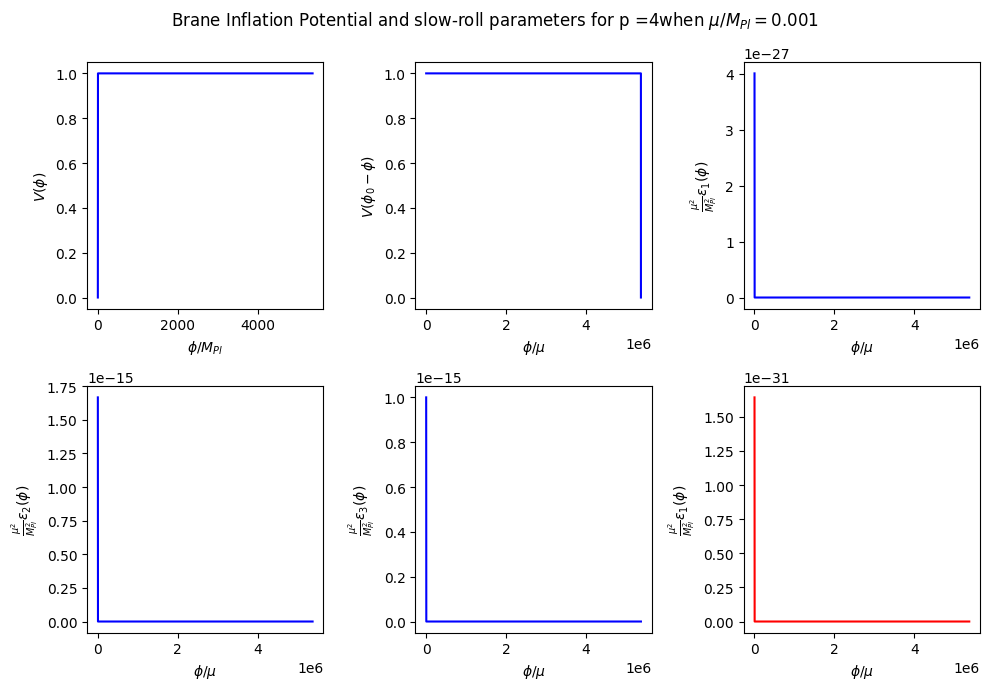

In [179]:
essai_ALL_wrt_mu(4)

List of cosmological models

In [180]:

#### -------  Setting up the parameters  -------  #####

#We run several simulations, stocked in this list
cosmo=[]


# 0th - Analytical one (we just give the parameters for the power spectra that we know from observations)

cosmo += [Class()]
cosmo[0].set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842, 'r':1, 'k_pivot':0.05})
cosmo[0].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
cosmo[0].set({'modes':'s,t'})   
cosmo[0].set({'Pk_ini_type':'analytic_Pk'}) 


## All the rest : Brane Inflation 
## V(phi) = M^4 * 1/ (1 + (phi/mu)^-n )
##  où  n=4                         fixé
##      mu/M_p \in  [1e-3,1e3]  pas fixé
##      M^4/mu^4 = v = 16/27        fixé


    #Masse de planck réduite
from math import pi
csteGrav = 6.6743015e-11
M_pl = 8*pi*csteGrav
# M_pl = 1
liste_mu = M_pl*np.logspace(-3,3,7)
# liste_mu = [M_pl*1e-3]
N0=len(liste_mu)

n=4
v=16/27

## V(phi) = M^4 * 1/ (1 + (phi/mu)^-n )
##  où  n=4                         fixé
##      mu/M_p \in  [1e-3,1e3]  pas fixé
##      M^4/mu^4 = v = 16/27        fixé



# 1st - Classical polynomial with Slow roll parameters
for i in range(len(liste_mu)):
    mu=liste_mu[i]
    M4=4*pi*pi*pow(mu,4)*16/27
    
    ## What is the value of phi_* ??
    phi=M_pl/mu
    phi=3*M_pl
    ## We need phi* the value of phi at the pivot scale k* that verifies the Horizon crossing condition :  a*H* = k*
    ## this value gives us the values of the Slow roll parameters PSR_i   that we must set  for the CLASS Module

    cosmo += [ Class() ]
    cosmo[1+i].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    cosmo[1+i].set({'modes':'s,t'})   
    cosmo[1+i].set({'Pk_ini_type':'inflation_V'})  
    cosmo[1+i].set({'potential':'polynomial'})
    cosmo[1+i].set({'PSR_0':epsilon1(phi,M4,mu,n),'PSR_1':epsilon2(phi,M4,mu,n),'PSR_2':epsilon3(phi,M4,mu,n),'PSR_3':0.,'PSR_4':0.})    

# 2nd - Brane Inflation with potential parameters

# for i in range(len(liste_mu)):
#     mu=liste_mu[i]
    
#     cosmo += [ Class() ]
#     cosmo[1+N0+i].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
#     cosmo[1+N0+i].set({'modes':'s,t'})   
#     cosmo[1+N0+i].set({'Pk_ini_type':'inflation_V'})  
#     cosmo[1+N0+i].set({'potential':'brane_inflation'})
#     cosmo[1+N0+i].set({'V_0':4*pi*pi*pow(mu,4)*v,'V_1':mu,'V_2':4,'V_3':0.,'V_4':0.})



In [181]:

## General parameters
l_max_scalars= 2500
l_max_tensors = 600


In [182]:
#Colors ( for the plotting blabla)
C=['magenta']
for i in range(len(liste_mu)):
    C.append(plt.get_cmap('autumn')(i/(N0+1)))

for i in range(len(liste_mu)):
    C.append(plt.get_cmap('winter')(i/(N0+1)))

# Number of cosmological models
N = len(cosmo) 
print(N)

l_label= [["Analytical",""]]
style = [ '--' ]

for i in range(len(liste_mu)):
    l_label.append(['Polynomial with Slow-Roll parameters',f'mu = {liste_mu[i]}'])
    style.append('-')

for i in range(len(liste_mu)):
    l_label.append(['Brane_inflation',f'mu = {liste_mu[i]}'])
    style.append('-')

8


In [183]:
# #### -------  We run the simulation -------  #####

# ## Run each Class computation
# for i in range(len(cosmo)):
#     cosmo[i].compute()

# primo = [ cosmo[i].get_primordial() for i in range(len(cosmo))]


In [184]:
# ###### ----- Extracting valuable data  (k, power spectra Ps(k), ...  correlation function in harmonic   Cl, ClT, ... ) ---- #####

# kk = [ primo[i]['k [1/Mpc]'] for i in range(N)]

# P_s= [ primo[i]['P_scalar(k)'] for i in range(N) ]
# P_t= [ primo[i]['P_tensor(k)'] for i in range(N) ]

# #cls = [ cosmo[i].raw_cl(l_max_tensors) for i in range(N) ]
# cls = [cosmo[i].lensed_cl(2500) for i in range(N)]
# ll = [cls[i]['ell'][2:] for i in range(N)]
# clTT = [cls[i]['tt'][2:] for i in range(N)]
# clEE = [cls[i]['ee'][2:] for i in range(N)]
# clPP = [cls[i]['pp'][2:] for i in range(N)]

# h = [ cosmo[i].h() for i in range(N) ] # get reduced Hubble for conversions to 1/Mpc




Essais et plottings !! :)

In [185]:
# ##### --------- Plotting ------- #####
# %matplotlib inline
# #
# import matplotlib
# import matplotlib.pyplot as plt
# #
# font = {'size'   : 16, 'family':'STIXGeneral'}
# axislabelfontsize='large'
# matplotlib.rc('font', **font)
# matplotlib.rcParams['legend.fontsize']='medium'
# plt.rcParams["figure.figsize"] = [8.0,6.0]



# # Power spectrum scalar

# for i in range(N):
#     for k in kk[i]:
#         P_s.append( primo[i]['P_scalar(k)'])
#         P_t.append(primo[i]['P_tensor(k)'])


#     plt.loglog(kk[i],P_s[i],color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
    

# plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
# plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
# plt.title(r"")

# plt.grid()
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.show()


# # plot C_l^TT
# from math import pi

# plt.figure(1)
# plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
# plt.xlabel(r'$\ell$')
# plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
# for i in range(N):
#     plt.plot(ll[i],clTT[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.show()



# # plot C_l^TT
# from math import pi

# plt.figure(1)
# plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
# plt.xlabel(r'$\ell$')
# plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
# for i in range(N):
#     plt.plot(ll[i],clTT[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.show()